In [1311]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

from scipy.fft import fft, ifft, fftfreq,rfft
import scipy.signal as signal


![Texto alternativo](CTSPDalgoritmo.jpg)


In [1312]:
df = pd.read_csv("C:\\Users\\jd.pradal\\OneDrive - Universidad de los andes\\Documentos\\Maestría\\TESIS JUAN DIEGO PRADA\\Tesis 2\\Código\\Descarga Datos K\\Hourly Energy Consumption\\archiv\\AEP_hourly.csv")


df['Datetime'] = pd.to_datetime(df['Datetime'], format='%Y-%m-%d %H:%M:%S')
df.sort_values(by='Datetime',inplace = True)
df.reset_index(drop=True, inplace=True)

In [1313]:
#datos = df[:8760]
datos = df[:500]
datos2 = df[-500:]

# ALGORITMO

## 1. the data owner calculates the auto - correlation function $R_{XX}(\tau)$ of the time series X to be released. 

In [1314]:
# función de autocorrelación de los datos: 
Rxx = sm.tsa.acf(datos['AEP_MW'], nlags=(len(datos['AEP_MW'])-1))



## 2. the data owner generates four IID Gauss white nouse series with the same lenght as X. their distribution satisfies $ G_{i} - N(0, \sqrt{2 \lambda} )...  \lambda =  \frac{ \Delta f} {\epsilon}, i \in {1,2,3,4} $


In [1315]:

# 2. # Generar 4 ruido blanco gaussiano

epsilon = 0.1
#loc = media, scale = desviacion

deltaF = 1

# Calcula lambda
l = deltaF / epsilon

# Calcula la desviación estándar del ruido blanco
desv = np.sqrt(2 * l)


# Genera las cuatro series de ruido blanco

# G1 = np.random.normal(loc=0, scale=desv, size=len(datos))
# G2 = np.random.normal(loc=0, scale=desv, size=len(datos))
# G3 = np.random.normal(loc=0, scale=desv, size=len(datos))
# G4 = np.random.normal(loc=0, scale=desv, size=len(datos))
    
    
G1 = np.random.normal(loc=0, scale=1, size=len(datos))
G2 = np.random.normal(loc=0, scale=1, size=len(datos))
G3 = np.random.normal(loc=0, scale=1, size=len(datos))
G4 = np.random.normal(loc=0, scale=1, size=len(datos))

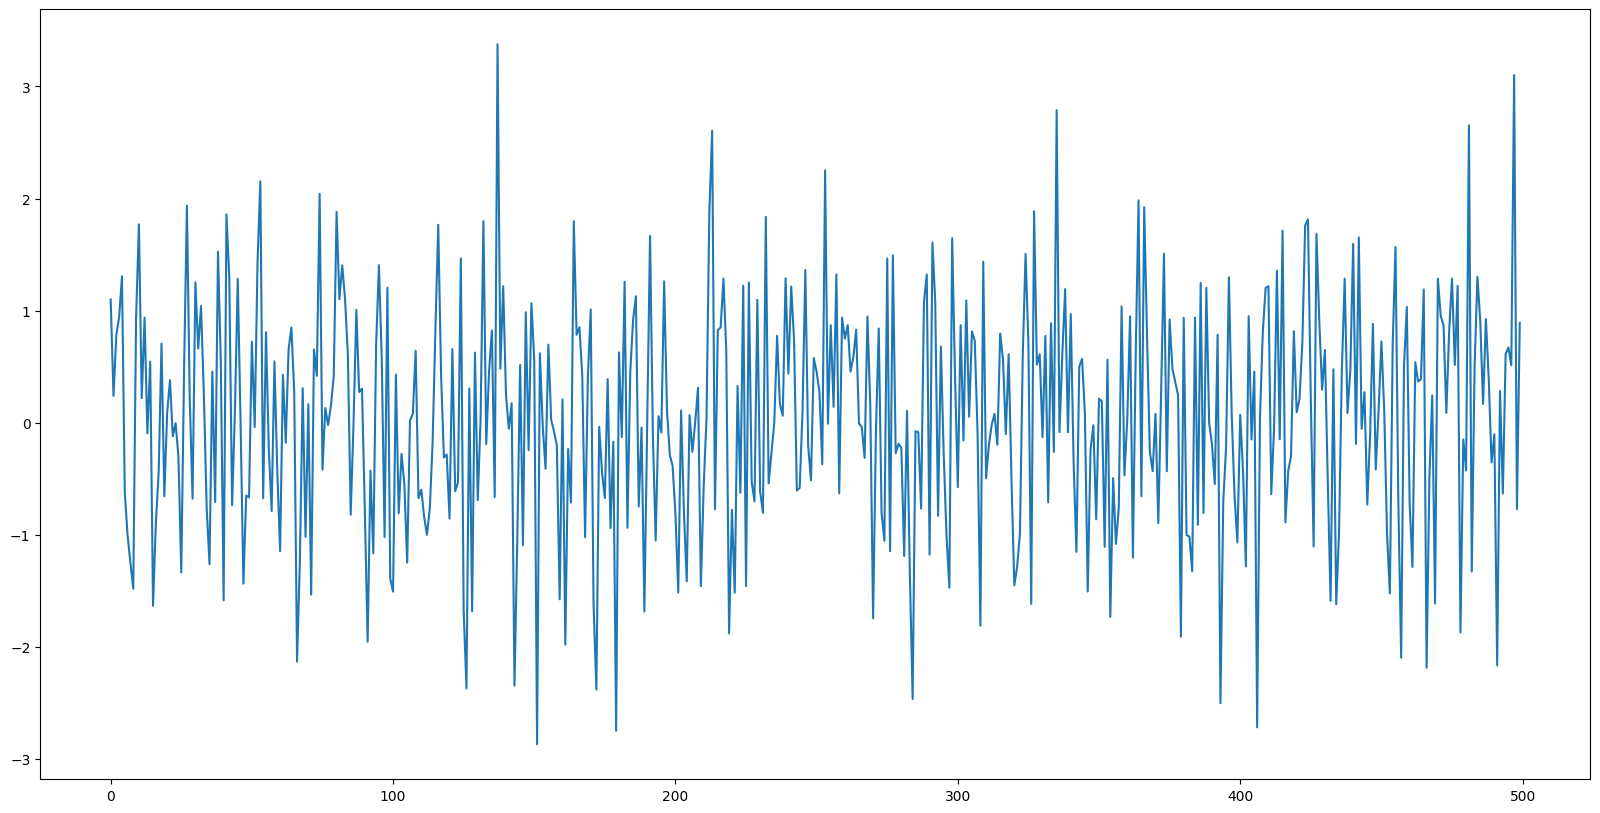

In [1316]:
    
G1 = np.random.normal(loc=0, scale=1, size=len(datos))
G2 = np.random.normal(loc=0, scale=1, size=len(datos))
G3 = np.random.normal(loc=0, scale=1, size=len(datos))
G4 = np.random.normal(loc=0, scale=1, size=len(datos))


plt.figure(figsize=(20,10))
plt.plot(G1,label = "G1")
# plt.plot(G2,label = "G2")
# plt.plot(G3,label = "G3")
# plt.plot(G4,label = "G4")

## 3.  let $ G_1, G_2, G_3, G_4$ pass through a specific filter whose impulse response $ h(\tau) is  \sqrt{\frac{R_{xx}(\tau)}{16 \pi N_0}} $ and obtain four new gauss noise series  $ G´_1, G´_2, G´_3, G´_4$ with the autocorrelation funcion $ R_{G´}(\tau) = \sqrt{\frac{R_{xx}(\tau)}{8}} $


In [1317]:


# def DFT_RG_PRIMA(Rxx, dt):
#     n = len(Rxx)
#     RG_PRIMA = np.abs(fft(np.sqrt(Rxx/8+0j), 2*n))**2
#     freq = fftfreq(2*n, dt)
#     RG_PRIMA = RG_PRIMA[:n]
#     freq = freq[:n]
#     return RG_PRIMA, freq

In [1318]:
def DFT_RG_PRIMA(Rxx, dt):
    n = len(Rxx)
    P_Gprima = fft(np.sqrt(Rxx/8+0j))
    P_Gprima = P_Gprima[:n]
    freq = fftfreq(n, dt)
    freq = freq[:n]
    return P_Gprima, freq

In [1319]:
# PSD de la función x
PG_PRIMA,frecuencias_RGPRIMA = DFT_RG_PRIMA(Rxx,1)

N_01 = np.var(G1) 
N_02 = np.var(G2) 
N_03 = np.var(G3) 
N_04 = np.var(G4) 



In [1320]:
PG_PRIMA

array([ 2.82282422e+01+3.63140371e+01j,  4.35113625e+00-7.06278746e+00j,
        3.40111676e+00-2.66555330e+00j,  5.82885276e+00-6.96150385e+00j,
       -1.56460696e-02-2.33811118e+00j,  9.24773945e-01-9.90893962e-01j,
        3.22654630e+00-4.19292979e+00j, -1.54813641e-01-8.42243201e-01j,
       -5.86163545e-02-6.91737397e-01j,  3.31143885e-01-1.55502655e+00j,
        2.94390235e-01-5.95421508e-01j,  2.72642115e-01-2.63928697e-01j,
        9.66900332e-01+3.34633532e-01j,  3.80051981e-01+4.56844886e-01j,
       -2.25402175e-01+7.74241324e-01j,  2.22740650e+00+3.82239239e-01j,
        7.64720013e-01+7.90236448e-01j,  6.44826461e-01+2.28940486e+00j,
        2.86658805e+00+2.19956329e+00j,  1.90799288e+00+2.64986847e+00j,
        3.93717480e+00+8.58969734e+00j,  1.28689350e+01-2.67623556e+01j,
       -2.04838184e+00-4.85933618e+00j, -1.91899070e+00-2.37650011e+00j,
        1.48304840e+00-5.39123874e-01j, -4.54820518e-01-2.17828032e+00j,
       -9.73884792e-01-1.63610866e+00j,  1.49782061

In [1321]:
N_01

1.027758055305936

In [1322]:
# N_01 = [N_01 for i in range(len(datos))]
# N_02 = [N_02 for i in range(len(datos))]
# N_03 = [N_03 for i in range(len(datos))]
# N_04 = [N_04 for i in range(len(datos))]

In [1323]:
# N_01_DFT = fft(N_01)
# N_02_DFT = fft(N_02)
# N_03_DFT = fft(N_03)
# N_04_DFT = fft(N_04)

In [1324]:
H_W1 = PG_PRIMA/N_01

H_W2 = PG_PRIMA/N_02

H_W3 = PG_PRIMA/N_03

H_W4 = PG_PRIMA/N_04


In [1325]:
G1_DFT = fft(G1)

G2_DFT = fft(G2)

G3_DFT = fft(G3)

G4_DFT = fft(G4)


In [1326]:
Filtro1 = G1_DFT * H_W1

Filtro2 = G2_DFT * H_W2

Filtro3 = G3_DFT * H_W3

Filtro4 = G4_DFT * H_W4

In [1327]:
G1_prima = ifft(Filtro1).real

G2_prima = ifft(Filtro2).real

G3_prima = ifft(Filtro3).real

G4_prima = ifft(Filtro4).real

In [1328]:
suma = np.add(np.power(G1_prima,2),np.power(G2_prima,2))

resta = np.subtract(suma,np.power(G3_prima,2))

Z = np.subtract(resta,np.power(G4_prima,2))



In [1329]:

RZ = sm.tsa.acf(Z, nlags=(len(Z)-1))

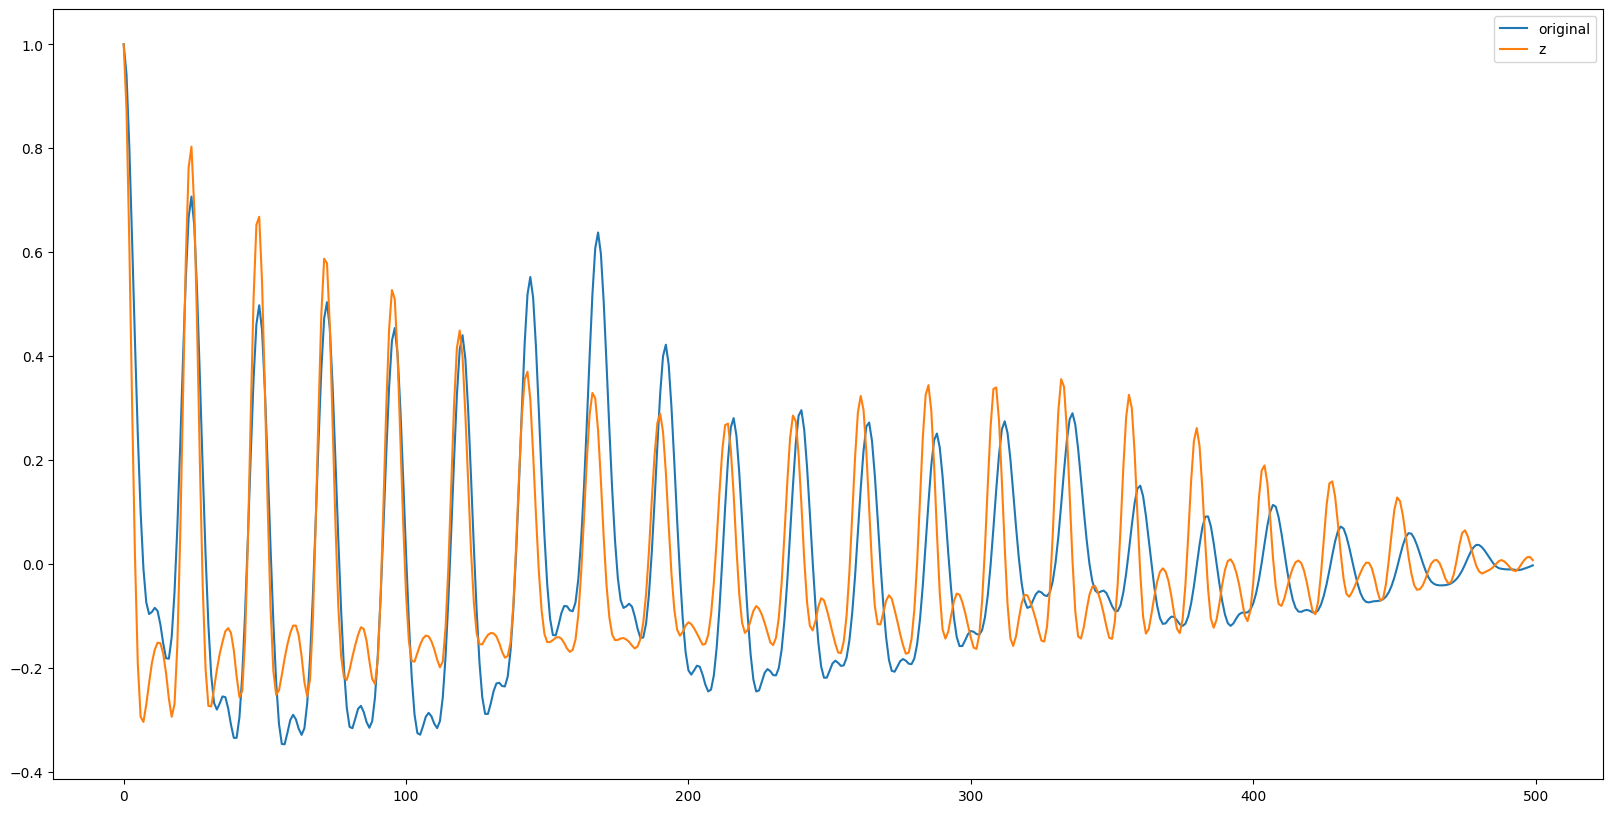

In [1330]:
plt.figure(figsize=(20,10))
plt.plot(Rxx,label = "original")
plt.plot(RZ,label = "z")
plt.legend()

In [1346]:
def CTSDP(datos):
        
    # función de autocorrelación de los datos: 
    Rxx = sm.tsa.acf(datos['AEP_MW'], nlags=(len(datos['AEP_MW'])-1))


    # crear 4 ruidos blancos    
    G1 = np.random.normal(loc=0, scale=1, size=len(datos))
    G2 = np.random.normal(loc=0, scale=1, size=len(datos))
    G3 = np.random.normal(loc=0, scale=1, size=len(datos))
    G4 = np.random.normal(loc=0, scale=1, size=len(datos))

    # encontrar Autocorrelación del ruido en frecuencia.

    RG_PRIMA,frecuencias_RGPRIMA = DFT_RG_PRIMA(Rxx,1)

    # encontrar N_0 de los ruidos
    N_01 = np.var(G1) 
    N_02 = np.var(G2) 
    N_03 = np.var(G3) 
    N_04 = np.var(G4) 

    # encntrar filtro en frecuencias 
    H_W1 = RG_PRIMA/N_01

    H_W2 = RG_PRIMA/N_02

    H_W3 = RG_PRIMA/N_03

    H_W4 = RG_PRIMA/N_04

    # pasar el ruido a dominio de frecuencias
    G1_DFT = fft(G1)

    G2_DFT = fft(G2)

    G3_DFT = fft(G3)

    G4_DFT = fft(G4)

    # aplicar filtro.

    Filtro1 = G1_DFT * H_W1

    Filtro2 = G2_DFT * H_W2

    Filtro3 = G3_DFT * H_W3

    Filtro4 = G4_DFT * H_W4

    # pasar ruido de frecuencias a dominio de tiempo

    G1_prima = ifft(Filtro1).real

    G2_prima = ifft(Filtro2).real

    G3_prima = ifft(Filtro3).real

    G4_prima = ifft(Filtro4).real

    # encontrar Z

    suma = np.add(np.power(G1_prima,2),np.power(G2_prima,2))

    resta = np.subtract(suma,np.power(G3_prima,2))

    Z = np.subtract(resta,np.power(G4_prima,2))

    # autocorrelación de Z
    RZ = sm.tsa.acf(Z, nlags=(len(Z)-1))

    return RZ,Rxx,RG_PRIMA,Filtro1

In [1347]:

RZ,Rxx,RG_PRIMA,Filtro1 = CTSDP(datos)


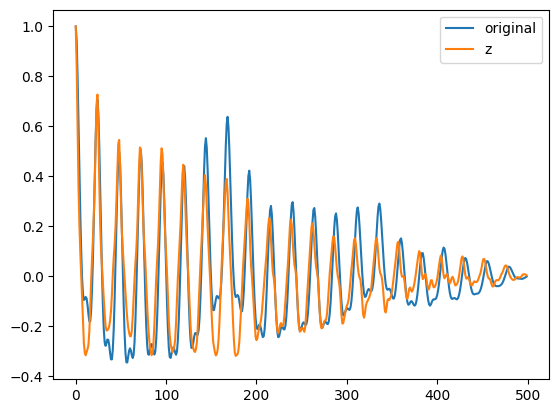

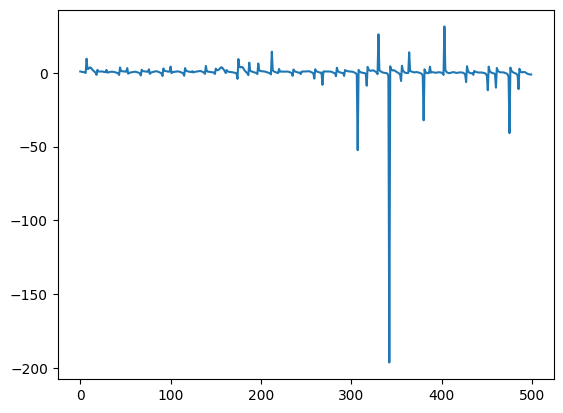

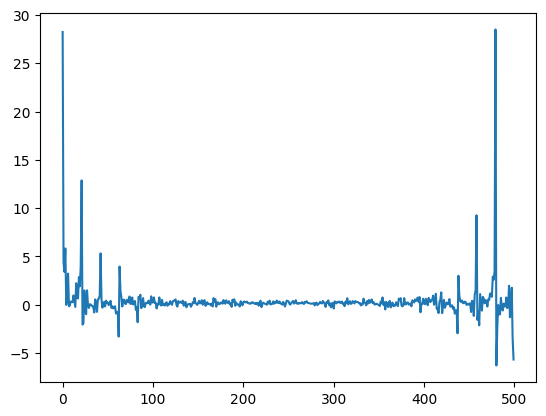

In [1348]:
RZ1,Rxx1,RG_PRIMA,Filtro1 = CTSDP(datos)
div = RZ1/Rxx1

plt.figure()
plt.plot(Rxx1,label = "original")
plt.plot(RZ1,label = "z")
plt.legend()
plt.show()


plt.figure()
plt.plot(div)
plt.show()

plt.figure()
plt.plot(RG_PRIMA)
plt.show()

In [1336]:
Filtro1

array([-6.99310276e+02-8.99623119e+02j, -1.95893626e+02+1.36949221e+02j,
        1.87135819e+01+1.39750383e+02j,  2.23637465e+01-1.40437709e+02j,
        2.18931731e+01-1.94788758e+01j,  2.02649906e+00+6.10047191e+00j,
        5.06331628e+01-8.37194137e+01j, -1.33115272e+01-1.36010016e+01j,
       -3.61764638e+00-1.72058299e+01j,  2.01647024e+01-1.05787021e+01j,
        2.10496761e+00+1.57500131e+01j,  9.54548309e+00+6.48043383e-01j,
        1.01161838e+01-2.81481174e+01j, -5.46303263e+00+7.81012921e+00j,
        1.48637382e+00+1.19370771e+01j,  3.73017834e+01+2.98164461e+01j,
       -1.50119505e+01+7.23802367e+00j, -1.92053274e-01+1.64401883e+01j,
       -1.54525420e+01-8.53985186e+01j, -9.09624793e+01-4.55105076e+01j,
        8.97355654e+01-1.41105980e+01j,  2.26623669e+02-3.70006832e+02j,
       -3.13099532e+01-1.82713367e+01j, -3.43916495e+01-8.63930478e+00j,
       -3.40874982e+01-6.12881087e+00j,  3.51073499e+01-3.47658431e+01j,
       -1.80329349e-01-4.38358178e+00j,  2.35832591

## 4. Calculate Z =  $ G´_1^{2}+ G´_2^{2}- G´_3^{2}- G´_4$


In [1337]:
PG_PRIMA,frecuencias_RGPRIMA = DFT_RG_PRIMA(Rxx,1)

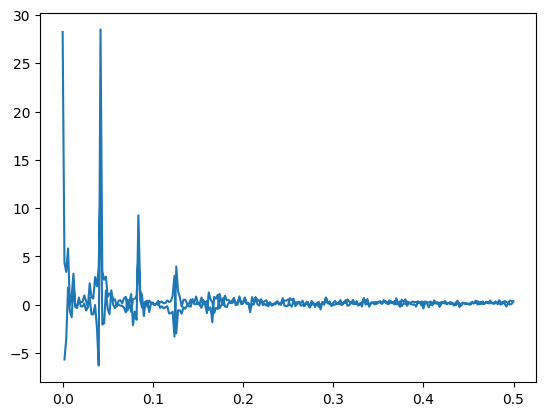

In [1338]:
plt.plot(np.abs(frecuencias_RGPRIMA),PG_PRIMA)
plt.show()

In [1339]:

PG_PRIMA,frecuencias_RGPRIMA = DFT_RG_PRIMA(Rxx,1)

In [1340]:
RG_PRIMA2, f= DFT_RG_PRIMA(Rxx,1)

In [1341]:
len(RG_PRIMA2)

500

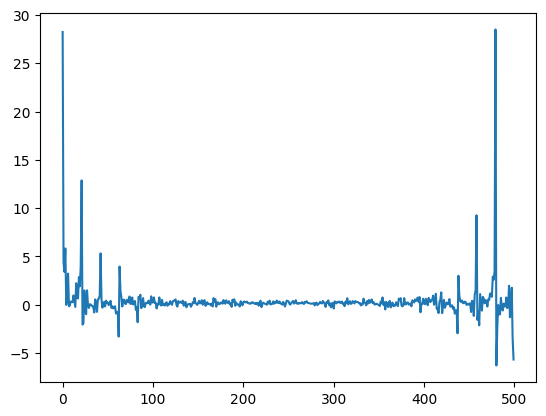

In [1342]:
plt.plot(RG_PRIMA2)

In [1343]:
RG_PRIMA

array([ 2.82282422e+01+3.63140371e+01j,  4.35113625e+00-7.06278746e+00j,
        3.40111676e+00-2.66555330e+00j,  5.82885276e+00-6.96150385e+00j,
       -1.56460696e-02-2.33811118e+00j,  9.24773945e-01-9.90893962e-01j,
        3.22654630e+00-4.19292979e+00j, -1.54813641e-01-8.42243201e-01j,
       -5.86163545e-02-6.91737397e-01j,  3.31143885e-01-1.55502655e+00j,
        2.94390235e-01-5.95421508e-01j,  2.72642115e-01-2.63928697e-01j,
        9.66900332e-01+3.34633532e-01j,  3.80051981e-01+4.56844886e-01j,
       -2.25402175e-01+7.74241324e-01j,  2.22740650e+00+3.82239239e-01j,
        7.64720013e-01+7.90236448e-01j,  6.44826461e-01+2.28940486e+00j,
        2.86658805e+00+2.19956329e+00j,  1.90799288e+00+2.64986847e+00j,
        3.93717480e+00+8.58969734e+00j,  1.28689350e+01-2.67623556e+01j,
       -2.04838184e+00-4.85933618e+00j, -1.91899070e+00-2.37650011e+00j,
        1.48304840e+00-5.39123874e-01j, -4.54820518e-01-2.17828032e+00j,
       -9.73884792e-01-1.63610866e+00j,  1.49782061

In [1344]:
fft(np.sqrt(Rxx/8+0j))

array([ 2.82282422e+01+3.63140371e+01j,  4.35113625e+00-7.06278746e+00j,
        3.40111676e+00-2.66555330e+00j,  5.82885276e+00-6.96150385e+00j,
       -1.56460696e-02-2.33811118e+00j,  9.24773945e-01-9.90893962e-01j,
        3.22654630e+00-4.19292979e+00j, -1.54813641e-01-8.42243201e-01j,
       -5.86163545e-02-6.91737397e-01j,  3.31143885e-01-1.55502655e+00j,
        2.94390235e-01-5.95421508e-01j,  2.72642115e-01-2.63928697e-01j,
        9.66900332e-01+3.34633532e-01j,  3.80051981e-01+4.56844886e-01j,
       -2.25402175e-01+7.74241324e-01j,  2.22740650e+00+3.82239239e-01j,
        7.64720013e-01+7.90236448e-01j,  6.44826461e-01+2.28940486e+00j,
        2.86658805e+00+2.19956329e+00j,  1.90799288e+00+2.64986847e+00j,
        3.93717480e+00+8.58969734e+00j,  1.28689350e+01-2.67623556e+01j,
       -2.04838184e+00-4.85933618e+00j, -1.91899070e+00-2.37650011e+00j,
        1.48304840e+00-5.39123874e-01j, -4.54820518e-01-2.17828032e+00j,
       -9.73884792e-01-1.63610866e+00j,  1.49782061

In [1345]:
len(fft(np.sqrt(Rxx/8+0j), n))**2

250000

## 5 add noise series Z into X and obtain the time series X' = X+Z



## Return X' 